In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_excel('Data/house_price_dống-da.xlsx')

/usr/local/lib/python3.9/dist-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   title              1000 non-null   object        
 1   address            1000 non-null   object        
 2   area               994 non-null    float64       
 3   price              944 non-null    float64       
 4   postDate           1000 non-null   datetime64[ns]
 5   land_certificate   693 non-null    object        
 6   house_direction    44 non-null     object        
 7   balcony_direction  24 non-null     object        
 8   toilet             551 non-null    float64       
 9   bedroom            635 non-null    float64       
 10  floor              376 non-null    float64       
 11  type_of_land       1000 non-null   object        
 12  street_name        808 non-null    object        
 13  ward_name          802 non-null    object        
 14  district_

In [52]:
df.describe()

,area,price,toilet,bedroom,floor,lat,long,Price/m2
count,951.000000,9.260000e+02,551.000000,635.000000,376.000000,951.000000,951.000000,926.000000
mean,144.210568,2.237204e+04,3.646098,3.959055,4.755319,21.015608,105.824421,169.815680
std,758.656729,1.206585e+05,2.170039,2.298311,1.664924,0.006682,0.009605,323.332078
min,6.500000,4.500000e+00,1.000000,1.000000,1.000000,20.998499,105.795544,0.120000
25%,43.000000,3.700000e+03,2.000000,3.000000,4.000000,21.010448,105.819278,34.570000
50%,62.000000,7.000000e+03,4.000000,4.000000,5.000000,21.017006,105.825845,116.000000
75%,126.000000,1.572500e+04,4.000000,5.000000,5.000000,21.020169,105.830091,229.572500
max,20000.000000,3.300000e+06,17.000000,22.000000,11.000000,21.036845,105.841429,8333.330000


## Yêu cầu vẽ biểu đồ kết hợp để
- Phân tích mối liên hệ giữa diện tích với giá nhà. Đồng thời, giữa số phòng ngủ với giá nhà và giữa số toilet với giá nhà.
- So sánh giá nhà trung bình trên 1 m2 giữa các hình thức nhà (type_of_land). Đồn thời thể hiện tỉ lệ % bài đăng (bản ghi) giữa các hình thức nhà (type_of_land).
- Vẽ biểu đồ thể hiện sự thay đổi giá nhà trung bình trên 1m2 theo số lượng phòng ngủ, theo số phòng toilet hoặc theo diện tích.


In [9]:
df['Price/m2'] = np.round(df['price'] / df['area'],2)
df['type_of_land'] = df['type_of_land'].str.replace('\n ','')
df = df[df['area'] > 0]

/tmp/ipykernel_8596/126873065.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1,1].set_xticklabels(price_m2_avg.index, rotation=45)


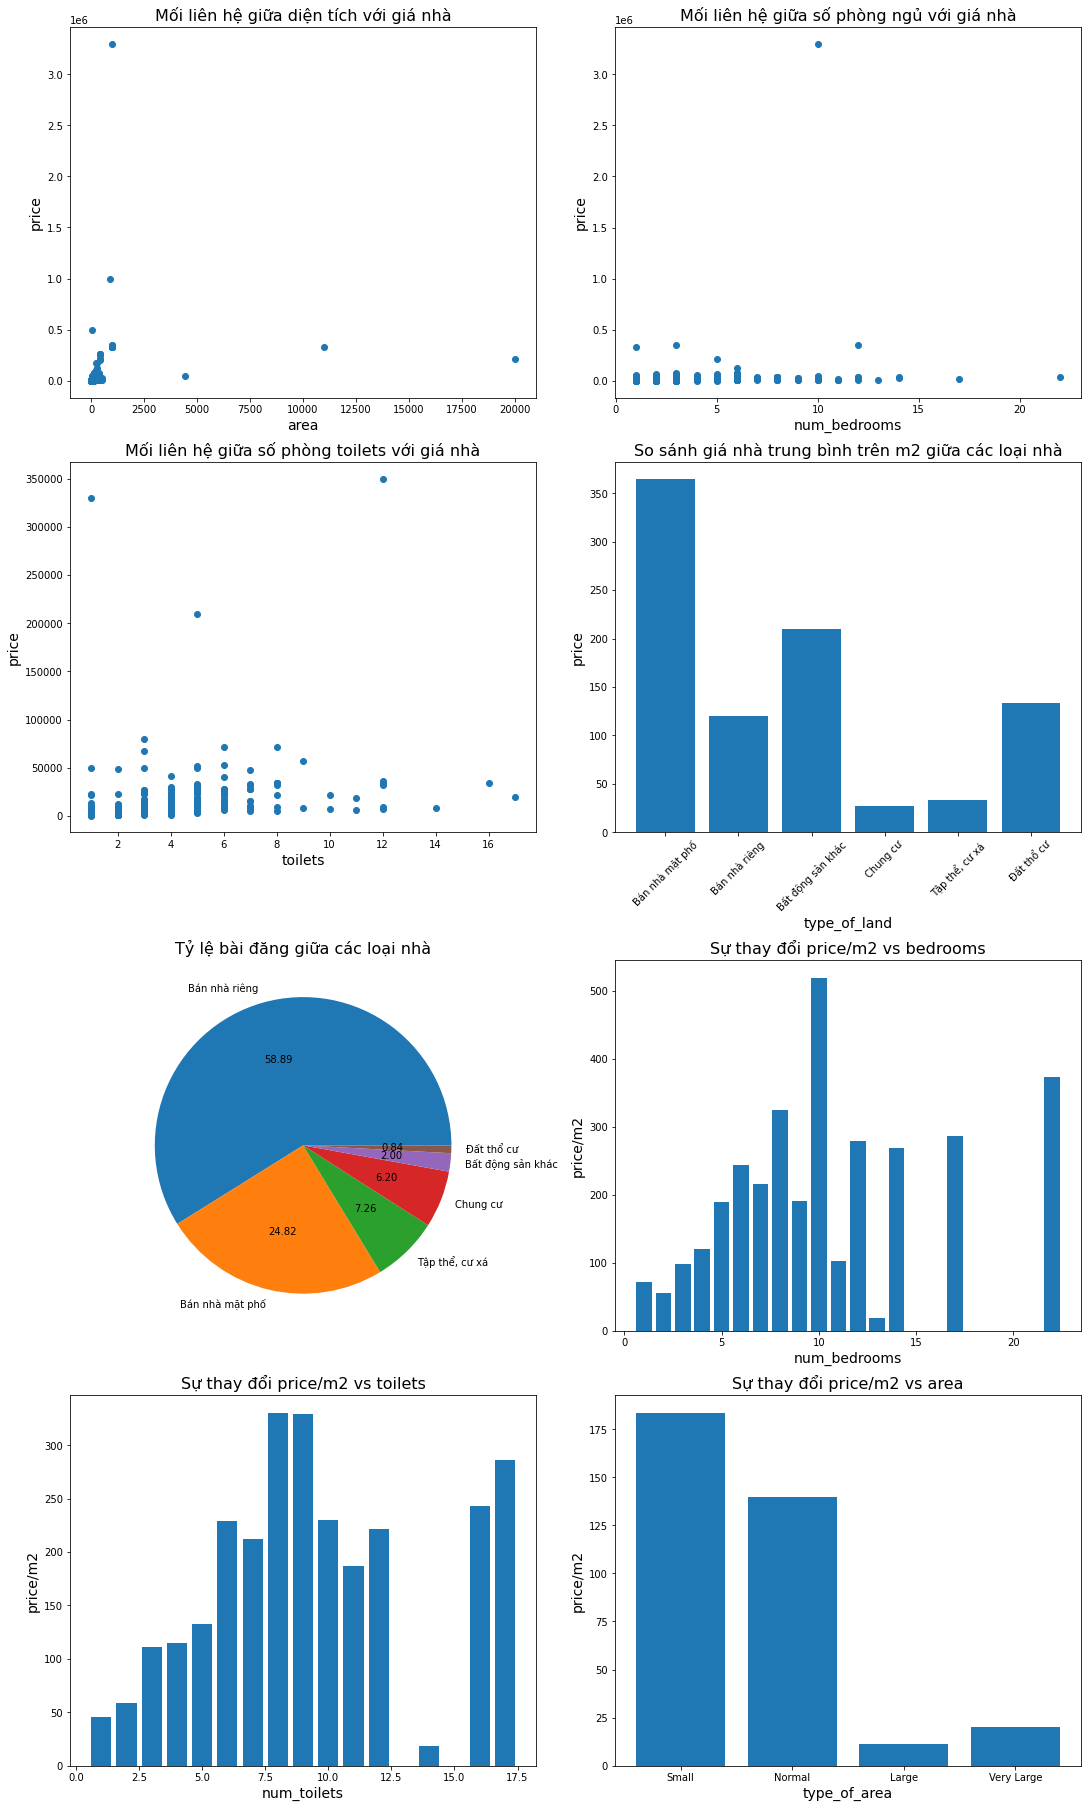

In [56]:
fig , axs = plt.subplots(4,2, figsize =(15,25),
                        constrained_layout = True)

axs[0,0].scatter(x = df['area'], y = df['price'])
axs[0,0].set_title('Mối liên hệ giữa diện tích với giá nhà', fontsize = 16)
axs[0,0].set_xlabel('area' ,fontsize = 14)
axs[0,0].set_ylabel('price',fontsize = 14)

axs[0,1].scatter(x = df['bedroom'], y = df['price'])
axs[0,1].set_title('Mối liên hệ giữa số phòng ngủ với giá nhà', fontsize = 16)
axs[0,1].set_xlabel('num_bedrooms', fontsize = 14)
axs[0,1].set_ylabel('price', fontsize = 14)

axs[1,0].scatter(x = df['toilet'], y = df['price'])
axs[1,0].set_title('Mối liên hệ giữa số phòng toilets với giá nhà', fontsize = 16)
axs[1,0].set_xlabel('toilets',fontsize = 14)
axs[1,0].set_ylabel('price',fontsize = 14)

# price/m2 giữa các loại nhà
price_m2_avg = df.groupby('type_of_land')['Price/m2'].mean()
axs[1,1].bar(x = price_m2_avg.index, height = price_m2_avg)
axs[1,1].set_title('So sánh giá nhà trung bình trên m2 giữa các loại nhà', fontsize = 16)
axs[1,1].set_xticklabels(price_m2_avg.index, rotation=45)
axs[1,1].set_xlabel('type_of_land',fontsize = 14)
axs[1,1].set_ylabel('price',fontsize = 14)

# % bài đăng giữa các loại nhà
num_records = df['type_of_land'].value_counts()
axs[2,0].pie(num_records, labels = num_records.index, autopct = '%.2f')
axs[2,0].set_title('Tỷ lệ bài đăng giữa các loại nhà', fontsize = 16)

bed_price_m2_avg = df.groupby('bedroom')['Price/m2'].mean()
axs[2,1].bar(x = bed_price_m2_avg.index, height = bed_price_m2_avg)
axs[2,1].set_title('Sự thay đổi price/m2 vs bedrooms', fontsize = 16)
axs[2,1].set_xlabel('num_bedrooms',fontsize = 14)
axs[2,1].set_ylabel('price/m2',fontsize = 14)


toilet_price_m2_avg = df.groupby('toilet')['Price/m2'].mean()
axs[3,0].bar(x = toilet_price_m2_avg.index, height = toilet_price_m2_avg)
axs[3,0].set_title('Sự thay đổi price/m2 vs toilets', fontsize = 16)
axs[3,0].set_xlabel('num_toilets',fontsize = 14)
axs[3,0].set_ylabel('price/m2',fontsize = 14)

# sử dụng pd.cut() để chia  area thành 4 bins = [Hẹp , Vừa, Rộng, Rất Rộng]

df['type_of_area'] = pd.cut(df['area'],bins=[0,100,1000,10000,20000], 
                            labels= ['Small', 'Normal', 'Large', 'Very Large'])
area_price_m2_avg = df.groupby('type_of_area')['Price/m2'].mean()
axs[3,1].bar(x = area_price_m2_avg.index, height = area_price_m2_avg)
axs[3,1].set_title('Sự thay đổi price/m2 vs area', fontsize = 16)
axs[3,1].set_xlabel('type_of_area',fontsize = 14)
axs[3,1].set_ylabel('price/m2',fontsize = 14)

plt.show()